# Data Exploration of Liga 1 Indonesia 2023-2024 Player

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read player_data.csv
player_data = pd.read_csv("player_data.csv")

## Basic Data Exploration ##

In [3]:
player_data.shape

(568, 12)

In [4]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kit_number           568 non-null    object
 1   player_name          568 non-null    object
 2   position             568 non-null    object
 3   Date of birth / Age  550 non-null    object
 4   nationality          568 non-null    object
 5   height               567 non-null    object
 6   foot                 522 non-null    object
 7   joined               568 non-null    object
 8   signed_from          564 non-null    object
 9   contract             538 non-null    object
 10  market_value         567 non-null    object
 11  club_name            568 non-null    object
dtypes: object(12)
memory usage: 53.4+ KB


In [5]:
player_data.head()

,kit_number,player_name,position,Date of birth / Age,nationality,height,foot,joined,signed_from,contract,market_value,club_name
0,3,Bayu Aji,Centre-Back,NaN,Indonesia,"1,78m",NaN,21-Jan-23,NZR Sumbersari FC,-,€10k,Arema FC
1,4,Syaeful Anwar,Centre-Back,"Dec 1, 1994 (28)",Indonesia,"1,84m",right,27-Apr-22,Persita Tangerang,2024,€125k,Arema FC
2,5,Bagas Adi,Centre-Back,"Mar 8, 1997 (26)",Indonesia,"1,76m",left,7-Jan-20,Bhayangkara FC,-,€200k,Arema FC
3,7,Ariel Lucero,Attacking Midfield,"Apr 16, 1999 (24)",Argentina,"1,70m",left,1-Jul-23,Club Atlético All Boys,-,€250k,Arema FC
4,8,Arkhan Fikri,Attacking Midfield,"Dec 28, 2004 (18)",Indonesia,"1,65m",right,15-Jun-22,PS Kwarta Deli Serdang,-,€150k,Arema FC


In [6]:
player_data.dtypes

kit_number             object
player_name            object
position               object
Date of birth / Age    object
nationality            object
height                 object
foot                   object
joined                 object
signed_from            object
contract               object
market_value           object
club_name              object
dtype: object

## Data Preparation and Cleaning

In [7]:
#Create birth_date column from Date of birth / Age
player_data["birth_date"] = player_data["Date of birth / Age"].str[:-5] #Get birth date string values
player_data['birth_date'] = pd.to_datetime(player_data['birth_date']) #Convert to datetime type

In [8]:
#Create birth_date column from Date of birth / Age
player_data["age"] = player_data["Date of birth / Age"].str[-3:-1] #Get age string values
player_data['age'] = pd.to_numeric(player_data['age']) #Convert to numeric

In [9]:
#Convert height column to numeric
player_data["height"] = player_data["height"].replace(["-","-."], 0) #Replace "-" values to 0
player_data["height"] = player_data["height"].str[:1] + "." + player_data["height"].str[2:4] #Get only the height number from string values
player_data["height"] = pd.to_numeric(player_data["height"]) #Convert to numeric

In [10]:
# Convert joined column to date_time
player_data["joined"] = player_data["joined"].replace("-",0) #Replace "-" to 0
player_data["joined"] = pd.to_datetime(player_data["joined"]) #Convert to datetime type

C:\Users\Marhamah Abdil\AppData\Local\Temp\ipykernel_10888\3564408422.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  player_data["joined"] = pd.to_datetime(player_data["joined"]) #Convert to datetime type


In [11]:
# Convert market_value column to numeric
player_data["market_value"] = player_data["market_value"].replace("-", 0) 
player_data["market_value"] = player_data["market_value"].str[1:-1] #Get only the market value number from string values
player_data["market_value"] = pd.to_numeric(player_data["market_value"]) #Convert to numeric type

In [12]:
# Convert the market_value unit from 1K EURO to 1M IDR
player_data["market_value"] = round(player_data["market_value"]*17.4/1000, 2)

In [13]:
# Remove unnecessary column
player_data = player_data.drop(columns='Date of birth / Age')

In [14]:
#Checking the column type again
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   kit_number    568 non-null    object        
 1   player_name   568 non-null    object        
 2   position      568 non-null    object        
 3   nationality   568 non-null    object        
 4   height        531 non-null    float64       
 5   foot          522 non-null    object        
 6   joined        568 non-null    datetime64[ns]
 7   signed_from   564 non-null    object        
 8   contract      538 non-null    object        
 9   market_value  504 non-null    float64       
 10  club_name     568 non-null    object        
 11  birth_date    550 non-null    datetime64[ns]
 12  age           550 non-null    float64       
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 57.8+ KB


### Handling Missing Values
For this player data, i will tried to search the empty data in internet. But when it still not found, the object dtypes will filled by "-" or "Unknown" and for the numeric and datetime type will left as NaN or 0

In [15]:
player_data.isnull().sum()

kit_number       0
player_name      0
position         0
nationality      0
height          37
foot            46
joined           0
signed_from      4
contract        30
market_value    64
club_name        0
birth_date      18
age             18
dtype: int64

In [16]:
# Fill object type missing values with "-"
player_data[['signed_from','foot','contract']] = player_data[['signed_from','foot','contract']].fillna("-")

### Correcting the similar values but written differently

In [17]:
player_data["position"].value_counts()

position
Centre-Back           91
Goalkeeper            69
Centre-Forward        65
Defensive Midfield    62
Attacking Midfield    61
Right Winger          51
Right-Back            45
Left-Back             41
Left Winger           34
Central Midfield      32
Midfield               4
Goal Keeper            3
Attack                 2
Center-Back            2
Second Striker         2
Left Midfield          1
Defence                1
Centre Midfield        1
Center Midfield        1
Name: count, dtype: int64

In [18]:
# Correcting data that have similar meaning but different input
player_data["position"] = player_data["position"].replace(["Attack", "Second Striker"], "Centre-Forward")
player_data["position"] = player_data["position"].replace(["Midfield", "Centre Midfield", "Center Midfield"], "Central Midfield")
player_data["position"] = player_data["position"].replace("Goal Keeper", "Goalkeeper")
player_data["position"] = player_data["position"].replace(["Center-Back","Defence"], "Centre-Back")
player_data["position"] = player_data["position"].replace("Left Midfield", "Attacking Midfield")

In [19]:
# Save updated data
player_data.to_csv("updated_player_data.csv")

## Getting insight from the data

### First is to get some basic statistical details from all data

In [20]:
# Parameter to separate object and numeric column type
numeric = ["age", "height", "market_value"]

# View some basic statistical details
player_data[numeric].describe()

,age,height,market_value
count,550.000000,531.000000,504.000000
mean,25.678182,1.758173,2.437282
std,4.913836,0.073450,1.615363
min,15.000000,1.580000,0.170000
25%,22.000000,1.700000,1.300000
50%,25.000000,1.750000,2.170000
75%,29.000000,1.810000,3.480000
max,42.000000,1.980000,10.440000


<Axes: xlabel='market_value', ylabel='Count'>

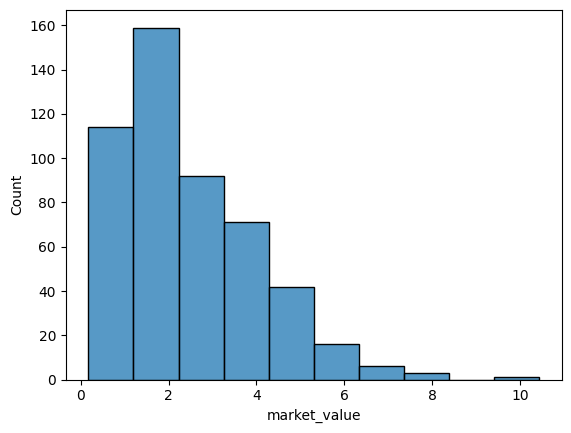

In [111]:
# Histogram plot of player market value
sns.histplot(data=player_data, x='market_value', bins=10)

<Axes: xlabel='age', ylabel='Count'>

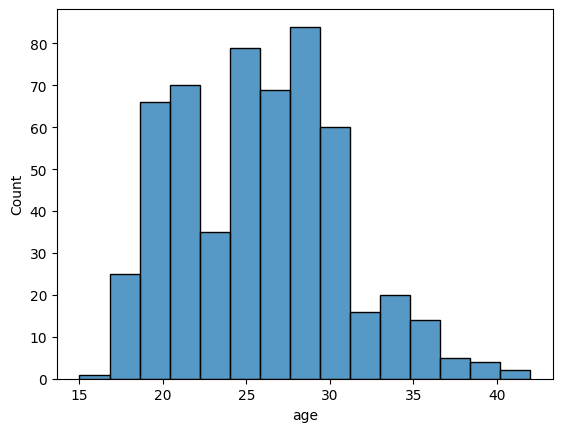

In [117]:
# Histogram plot of player age
sns.histplot(data=player_data, x='age', bins=15)

<Axes: xlabel='height', ylabel='Count'>

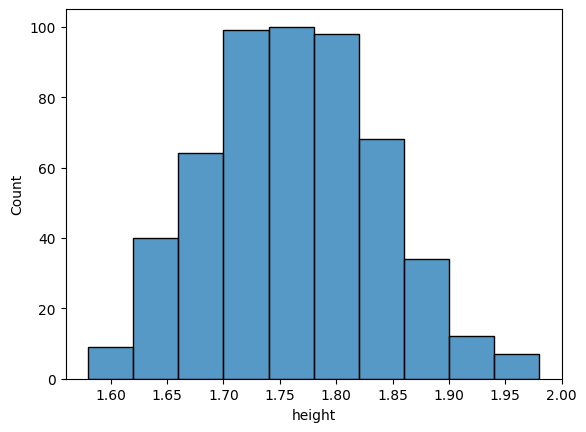

In [119]:
# Histogram plot of player height
sns.histplot(data=player_data, x='height', bins=10)

### Then get some facts and insights from the data

1. Five players with the highest market value

In [21]:
player_data.sort_values(by='market_value', ascending=False).head()

,kit_number,player_name,position,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date,age
146,22,Dimitrios Kolovos,Attacking Midfield,Greece,1.84,both,2023-07-01,Panetolikos GFS,2025,10.44,Dewa United FC,1993-04-27,30.0
244,23,Marc Klok,Central Midfield,Indonesia,1.77,right,2021-06-30,Persija Jakarta,-,8.26,Persib Bandung,1993-04-20,30.0
158,92,Sonny Stevens,Goalkeeper,Netherlands,1.94,right,2023-07-01,OFI Crete FC,-,7.83,Dewa United FC,1992-06-22,31.0
90,33,Matías Mier,Attacking Midfield,Uruguay,1.82,left,2023-01-20,Independiente Santa Fe,-,7.83,Bhayangkara FC,1990-08-02,32.0
63,94,Jefferson,Centre-Forward,Brazil,1.85,-,2023-07-05,Gzira United FC,-,6.96,Bali United FC,1994-10-21,28.0


2. Five Indonesia players with the highest market value

In [22]:
player_data[player_data['nationality']=='Indonesia'].sort_values(by='market_value', ascending=False).head()

,kit_number,player_name,position,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date,age
244,23,Marc Klok,Central Midfield,Indonesia,1.77,right,2021-06-30,Persija Jakarta,-,8.26,Persib Bandung,1993-04-20,30.0
248,53,Rachmat Irianto,Centre-Back,Indonesia,1.75,right,2022-04-05,Persebaya Surabaya,-,5.65,Persib Bandung,1999-09-03,23.0
280,74,Rizky Ridho,Centre-Back,Indonesia,1.83,right,2023-07-01,Persebaya Surabaya,30-Jun-26,5.65,Persija Jakarta,2001-11-21,21.0
107,14,Stefano Lilipaly,Right Winger,Indonesia,1.75,right,2022-05-01,Bali United FC,30-Apr-24,5.65,Borneo FC Samarinda,1990-01-10,33.0
37,9,Ilija Spasojević,Centre-Forward,Indonesia,1.87,both,2017-12-13,Bhayangkara FC,31-Dec-23,5.22,Bali United FC,1987-09-11,35.0


3. Five oldest player

In [23]:
player_data.sort_values(by='age', ascending=False).head()

,kit_number,player_name,position,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date,age
165,9,Beto,Centre-Forward,Indonesia,1.75,right,2022-01-03,PERSIS Solo,"Dec, 2023",0.43,Madura United FC,1980-12-31,42.0
276,56,Maman Abdurahman,Centre-Back,Indonesia,1.77,right,2015-07-01,Persita Tangerang,31-Mar-23,0.17,Persija Jakarta,1982-05-12,41.0
190,81,Wawan Hendrawan,Goalkeeper,Indonesia,1.78,right,2023-07-06,RANS Nusantara FC,-,0.43,Madura United FC,1983-01-08,40.0
166,10,Slamet Nurcahyono,Attacking Midfield,Indonesia,1.65,right,2016-02-01,Bhayangkara Surabaya United,2024,0.43,Madura United FC,1983-07-11,39.0
552,23,Hamka Hamzah,Centre-Back,Indonesia,1.83,right,2023-07-01,FC Bekasi City,-,NaN,RANS Nusantara FC,1984-01-29,39.0


4. Five youngest player

In [24]:
player_data.sort_values(by='age', ascending=True).head()

,kit_number,player_name,position,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date,age
375,80,Arkhan Kaka,Centre-Forward,Indonesia,1.88,right,2023-01-01,PERSIS Solo Youth,-,0.87,Persis Solo,2007-09-02,15.0
501,71,Mufli Hidayat,Centre-Forward,Indonesia,1.72,right,2022-12-01,PSM Makassar Youth,-,0.87,PSM Makassar,2005-08-07,17.0
422,16,Alexandro Kamuru,Left-Back,Indonesia,1.70,left,2021-03-04,PS Barito Putera Youth,-,0.43,PS Barito Putra,2005-08-19,17.0
117,26,Rizdjar Nurviat,Right-Back,Indonesia,1.77,right,2023-07-01,Borneo FC Samarinda Youth,30-Apr-27,NaN,Borneo FC Samarinda,2006-01-02,17.0
120,54,Alfharezzi Buffon,Centre-Back,Indonesia,1.72,-,2023-01-21,Borneo FC Samarinda Youth,30-Apr-27,0.17,Borneo FC Samarinda,2006-04-28,17.0


5. Five tallest player

In [25]:
player_data.sort_values(by='height', ascending=False).head()

,kit_number,player_name,position,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date,age
475,4,Yuran Fernandes,Centre-Back,Cape Verde,1.98,left,2022-06-04,SC União Torreense,2026,5.65,PSM Makassar,1994-10-19,28.0
34,4,Elias Dolah,Centre-Back,Thailand,1.96,right,2023-07-01,Port FC,31-May-24,4.35,Bali United FC,1993-04-24,30.0
471,93,Lucão,Centre-Back,Brazil,1.96,right,2023-07-01,Persikabo 1973,-,3.91,PSIS Semarang,1993-07-10,29.0
373,55,Erlangga Setyo,Goalkeeper,Indonesia,1.95,right,2023-01-01,PERSIS Solo Youth,31-May-26,0.43,Persis Solo,2003-04-16,20.0
32,1,Adilson Maringá,Goalkeeper,Brazil,1.94,right,2023-07-01,Arema FC,-,5.22,Bali United FC,1990-08-22,32.0


6. Five shortest player

In [26]:
player_data.sort_values(by='height', ascending=True).head()

,kit_number,player_name,position,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date,age
531,46,Todd Ferre,Attacking Midfield,Indonesia,1.58,right,2022-05-11,Persipura Jayapura,-,3.04,PSS Sleman,1999-03-15,24.0
126,90,Muhammad Sihran,Left Winger,Indonesia,1.58,left,2018-09-01,Borneo FC Samarinda Youth,30-Apr-24,2.61,Borneo FC Samarinda,1999-03-08,24.0
271,25,Riko Simanjuntak,Right Winger,Indonesia,1.58,right,2018-02-01,Semen Padang FC,30-Jun-26,3.91,Persija Jakarta,1992-01-26,31.0
516,14,Diop Wamu,Central Midfield,Indonesia,1.59,-,2023-07-01,Without Club,2026,NaN,PSS Sleman,2002-06-20,21.0
506,3,Muhammad Fariz,Right-Back,Indonesia,1.60,right,2022-07-01,PSS Sleman Youth,-,0.43,PSS Sleman,2004-09-02,18.0


7. Young player (U-23) with the highest market value

In [27]:
player_data[player_data['age'] < 23].sort_values(by='market_value', ascending=False).head()

,kit_number,player_name,position,nationality,height,foot,joined,signed_from,contract,market_value,club_name,birth_date,age
280,74,Rizky Ridho,Centre-Back,Indonesia,1.83,right,2023-07-01,Persebaya Surabaya,30-Jun-26,5.65,Persija Jakarta,2001-11-21,21.0
378,99,Ramadhan Sananta,Centre-Forward,Indonesia,1.82,right,2023-07-01,PSM Makassar,31-May-25,4.35,Persis Solo,2002-11-27,20.0
231,7,Beckham Putra,Attacking Midfield,Indonesia,1.73,right,2019-01-01,PERSIB Bandung Youth,-,4.35,Persib Bandung,2001-10-29,21.0
256,2,Rio Fahmi,Right-Back,Indonesia,1.70,right,2021-08-01,Persija Jakarta Youth,30-Jun-25,3.91,Persija Jakarta,2001-10-06,21.0
454,19,Alfeandra Dewangga,Centre-Back,Indonesia,1.79,left,2020-01-10,PSIS Semarang Youth,30-Jun-25,3.91,PSIS Semarang,2001-06-28,22.0


8. Get information based on club: total player registered, total market value, average height, and average age

In [28]:
club_color = {'Arema FC':'blue','Bali United FC':'red','Bhayangkara FC':'yellow', 'Borneo FC Samarinda':'orange', 'Dewa United FC':'gold', 'Madura United FC':'red',
              'PS Barito Putra':'yellow', 'PSIS Semarang':'blue', 'PSM Makassar':'red', 'PSS Sleman':'green', 'Persebaya Surabaya':'green', 'Persib Bandung':'blue',
              'Persija Jakarta':'red', 'Persik Kediri':'purple', 'Persikabo 1973':'green', 'Persis Solo':'red', 'Persita Tangerang':'purple', 'RANS Nusantara FC':'magenta'}

In [29]:
# Get some information based on club: total player registered, total market value, average height, and average age
club_data = player_data.groupby("club_name")[["player_name","market_value","height","age"]].aggregate({"player_name":'count',"market_value":'sum','height':'mean','age':'mean'}).round(2)
club_data

,player_name,market_value,height,age
club_name,,,,
Arema FC,32,65.36,1.77,25.81
Bali United FC,32,89.70,1.76,27.32
Bhayangkara FC,35,66.66,1.76,25.61
Borneo FC Samarinda,30,78.57,1.77,25.13
Dewa United FC,31,88.23,1.77,25.77
Madura United FC,33,60.98,1.74,27.45
PS Barito Putra,33,60.39,1.75,25.58
PSIS Semarang,29,63.43,1.77,24.36
PSM Makassar,32,66.03,1.78,24.26


[Text(0.5, 0, ''), Text(0, 0.5, '')]

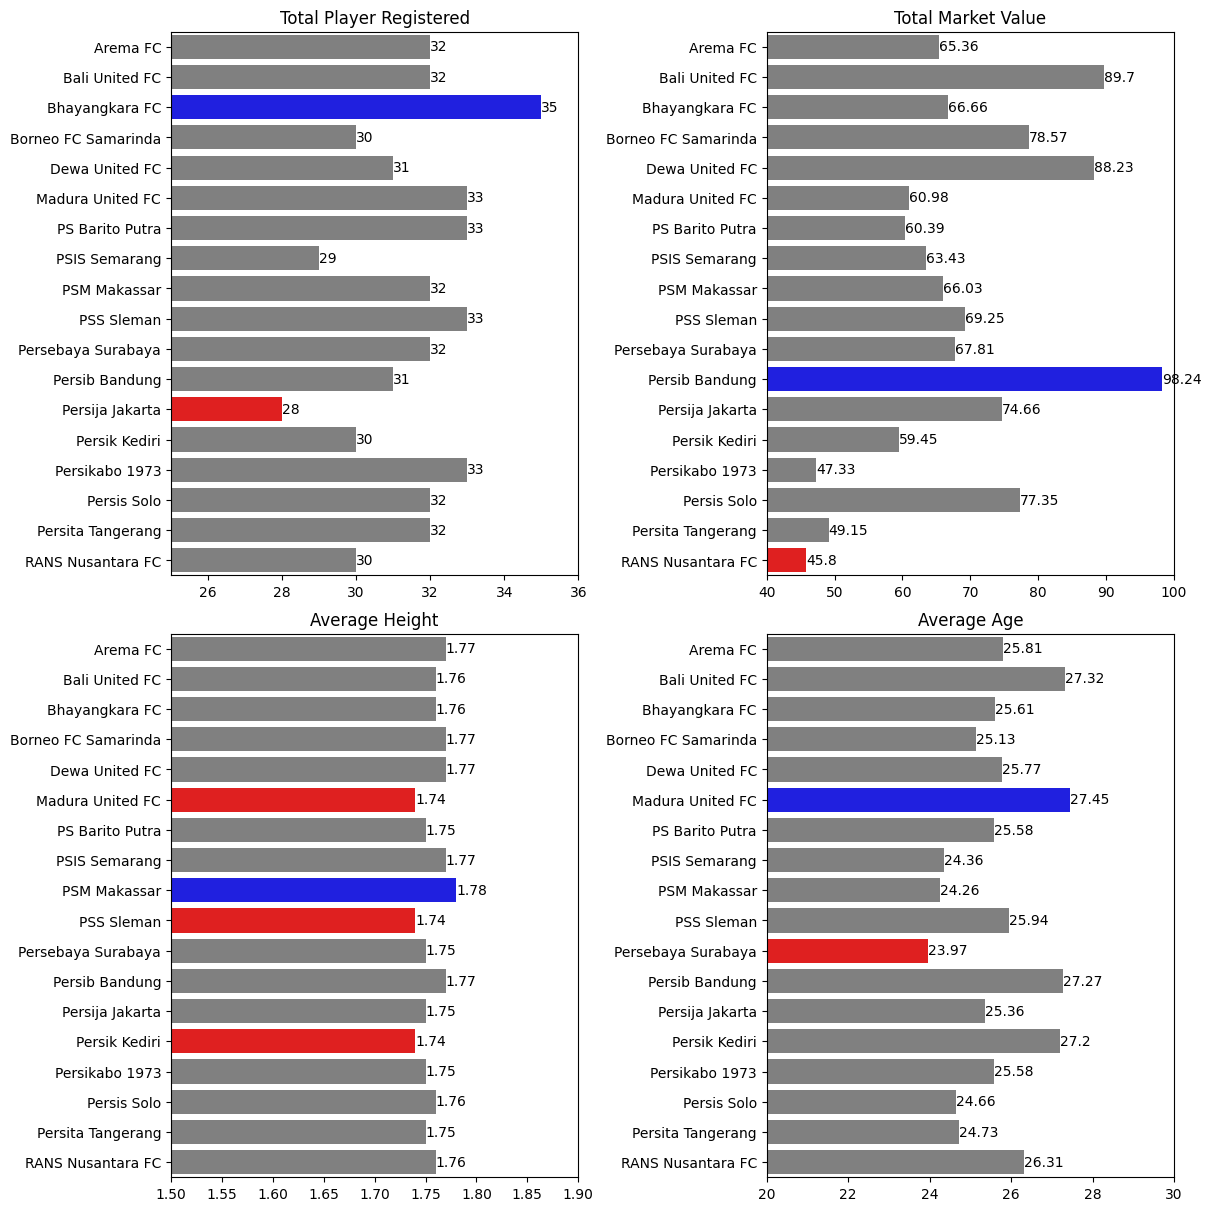

In [30]:
#Plot the data based on club
fig, axs = plt.subplots(figsize=(12,12), nrows=2, ncols=2, constrained_layout=True)
clrs = ['red' if (x == min(club_data['player_name'])) else 'grey' if(x < max(club_data['player_name']))  else 'blue' for x in club_data['player_name'] ]
clrs2 = ['red' if (x == min(club_data['market_value'])) else 'grey' if(x < max(club_data['market_value']))  else 'blue' for x in club_data['market_value'] ]
clrs3 = ['red' if (x == min(club_data['height'])) else 'grey' if(x < max(club_data['height']))  else 'blue' for x in club_data['height'] ]
clrs4 = ['red' if (x == min(club_data['age'])) else 'grey' if(x < max(club_data['age']))  else 'blue' for x in club_data['age'] ]
ax = sns.barplot(data=club_data, x='player_name', y=club_data.index, palette=clrs, ax=axs[0][0])
ax2 = sns.barplot(data=club_data, x='market_value', y=club_data.index, palette=clrs2, ax=axs[0][1])
ax3 = sns.barplot(data=club_data, x='height', y=club_data.index, ax=axs[1][0], palette=clrs3)
ax4 = sns.barplot(data=club_data, x='age', y=club_data.index, ax=axs[1][1], palette=clrs4)
ax.bar_label(ax.containers[0])
ax2.bar_label(ax2.containers[0])
ax3.bar_label(ax3.containers[0])
ax4.bar_label(ax4.containers[0])
ax.set_title("Total Player Registered")
ax2.set_title("Total Market Value")
ax3.set_title("Average Height")
ax4.set_title("Average Age")
ax.set_xlim(25,36)
ax2.set_xlim(40,100)
ax3.set_xlim(1.5,1.9)
ax4.set_xlim(20,30)
ax.set(xlabel=None,ylabel=None)
ax2.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)
ax4.set(xlabel=None, ylabel=None)

9. Get the data about foreign player registered for each club

In [31]:
player_data[player_data["nationality"] != "Indonesia"].groupby("club_name")[["player_name","market_value","height","age"]].aggregate({"player_name":'count',"market_value":['mean','sum'],'height':'mean','age':'mean'})

player_name market_value           height        age
                          count         mean    sum      mean       mean
club_name                                                               
Arema FC                      6     4.022500  16.09  1.833333  25.833333
Bali United FC                6     5.510000  33.06  1.825000  30.000000
Bhayangkara FC                6     4.640000  27.84  1.815000  30.000000
Borneo FC Samarinda           6     3.911667  23.47  1.848333  26.666667
Dewa United FC                6     5.653333  33.92  1.876667  30.166667
Madura United FC              6     4.855000  29.13  1.790000  28.333333
PS Barito Putra               6     3.696667  22.18  1.791667  29.666667
PSIS Semarang                 6     3.840000  23.04  1.798333  28.400000
PSM Makassar                  6     4.086000  20.43  1.881667  28.333333
PSS Sleman                    6     4.420000  26.52  1.813333  28.833333
Persebaya Surabaya            6     4.640000  27.84  1.781667  27.166667
Persib Bandung                6     4.783333  28.70  1.826667  31.000000
Persija Jakarta               5     3.652000  18.26  1.746000  30.800000
Persik Kediri                 6     3.261667  19.57  1.813333  29.333333
Persikabo 1973                6     2.175000   4.35  1.800000  27.333333
Persis Solo                   6     4.856667  29.14  1.793333  30.333333
Persita Tangerang             6     3.403333  20.42  1.776667  29.500000
RANS Nusantara FC             6     3.480000  10.44  1.800000  28.166667

10. Exploration data of foreign players based on their nationality

In [32]:
foreign = pd.DataFrame(player_data[player_data["nationality"] != "Indonesia"].groupby('nationality')[['player_name','market_value','height','age']].aggregate({"player_name":'count',"market_value":'mean','height':'mean','age':'mean'}))
foreign = foreign.reset_index()
foreign.sort_values(by='player_name', ascending=False)

,nationality,player_name,market_value,height,age
4,Brazil,31,4.541852,1.829677,29.806452
23,Philippines,13,2.463333,1.779231,26.230769
12,Japan,8,4.238750,1.722500,27.625000
25,Portugal,8,4.002000,1.851250,27.250000
2,Argentina,7,4.410000,1.744286,28.714286
20,Netherlands,4,5.980000,1.925000,29.500000
16,Mali,3,4.346667,1.800000,29.000000
28,Spain,3,5.220000,1.843333,31.666667
27,Singapore,2,2.825000,1.775000,26.000000
14,Lebanon,2,5.435000,1.850000,28.500000


11. Countries that contribute more than 1 player to Liga 1

Text(0.5, 1.0, 'Total Player')

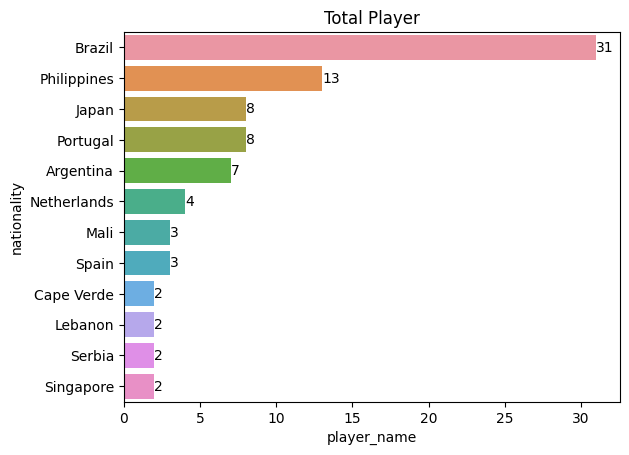

In [33]:
most_country = foreign[foreign['player_name'] > 1].sort_values(by='player_name', ascending=False)
#c = ['red' if (x == min(most_country['age'])) else 'grey' if(x < max(club_data['age']))  else 'blue' for x in club_data['age'] ]
most_country_plot = sns.barplot(data=most_country, x='player_name', y='nationality')
most_country_plot.bar_label(most_country_plot.containers[0])
most_country_plot.set_title("Total Player")

12. Countries with the lowest and highest average age in liga 1

Text(0.5, 1.0, 'Highest Average Age')

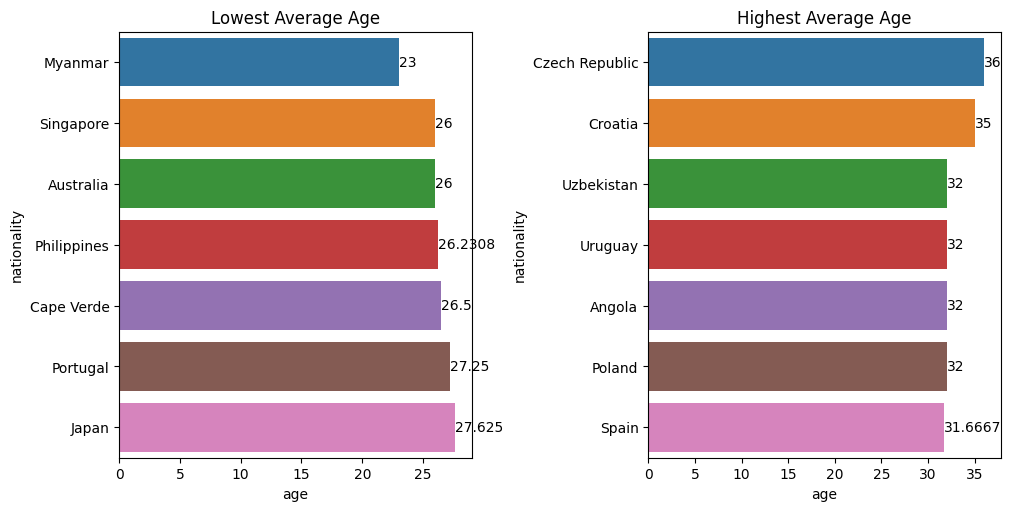

In [34]:
#Get data
low_age = foreign[['nationality','age']].sort_values(by='age', ascending=True).head(7)
high_age = foreign[['nationality','age']].sort_values(by='age', ascending=False).head(7)

#Plot data
fig, axs = plt.subplots(figsize=(10,5),ncols=2, constrained_layout=True)
low_age_plot = sns.barplot(data=low_age, x='age', y='nationality', ax=axs[0])
high_age_plot = sns.barplot(data=high_age, x='age', y='nationality', ax=axs[1])
low_age_plot.bar_label(low_age_plot.containers[0])
high_age_plot.bar_label(high_age_plot.containers[0])
low_age_plot.set_title("Lowest Average Age")
high_age_plot.set_title("Highest Average Age")

13. Countries with lowest and highest market value average

Text(0.5, 1.0, 'Highest Average Market Value')

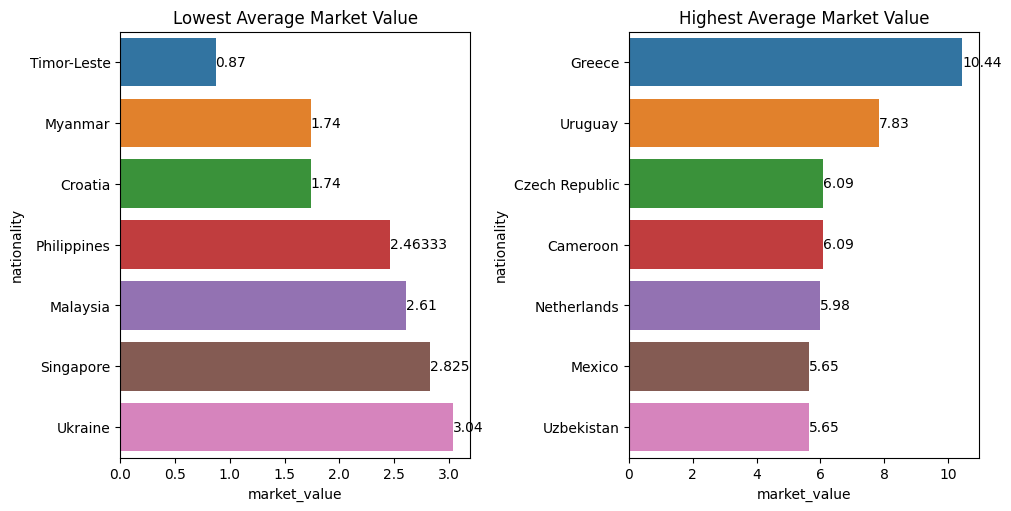

In [35]:
#Get data
low_mv = foreign[['nationality','market_value']].sort_values(by='market_value', ascending=True).head(7)
high_mv = foreign[['nationality','market_value']].sort_values(by='market_value', ascending=False).head(7)

#Plot data
fig, axs = plt.subplots(figsize=(10,5),ncols=2, constrained_layout=True)
low_mv_plot = sns.barplot(data=low_mv, x='market_value', y='nationality', ax=axs[0])
high_mv_plot = sns.barplot(data=high_mv, x='market_value', y='nationality', ax=axs[1])
low_mv_plot.bar_label(low_mv_plot.containers[0])
high_mv_plot.bar_label(high_mv_plot.containers[0])
low_mv_plot.set_title("Lowest Average Market Value")
high_mv_plot.set_title("Highest Average Market Value")

14. From which continent are the foreign players who play in Liga 1

In [36]:
#function to convert to alpha2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    country = []
    continent = []
    for nat in col:
        try:
            cn_a2_code =  country_name_to_country_alpha2(nat)
        except:
            cn_a2_code = 'Unknown' 
        try:
            cn_continent = country_alpha2_to_continent_code(cn_a2_code)
        except:
            cn_continent = 'Unknown' 
        country.append(cn_a2_code)
        continent.append(cn_continent)
    return country, continent

In [37]:
foreign = foreign.replace('Korea, South', 'South Korea') # Correcting country name

# Get country code and continent
code, code2 = get_continent(foreign['nationality'])
foreign['code'] = code
foreign['continent'] = code2
foreign = foreign.replace('Unknown', 'AS')

In [38]:
# Convert continent code to continent name
continent_dict = {'AS':'Asia', 'AF':'Africa', 'SA':'South America', 'OC':'Osceania', 'EU':'Europe', 'NA':'North America'}
foreign = foreign.replace({'continent':continent_dict})

In [39]:
continent = foreign.groupby('continent')[['player_name','market_value','height','age']].aggregate({"player_name":'sum',"market_value":'mean','height':'mean','age':'mean'})
continent

,player_name,market_value,height,age
continent,,,,
Africa,8,4.781667,1.794000,29.900000
Asia,34,3.626314,1.805902,28.529647
Europe,24,4.861091,1.851780,30.856061
North America,1,5.650000,1.700000,28.000000
Osceania,1,5.220000,1.880000,26.000000
South America,39,5.593951,1.797988,30.173579


Text(0.5, 1.0, 'Average Market Value')

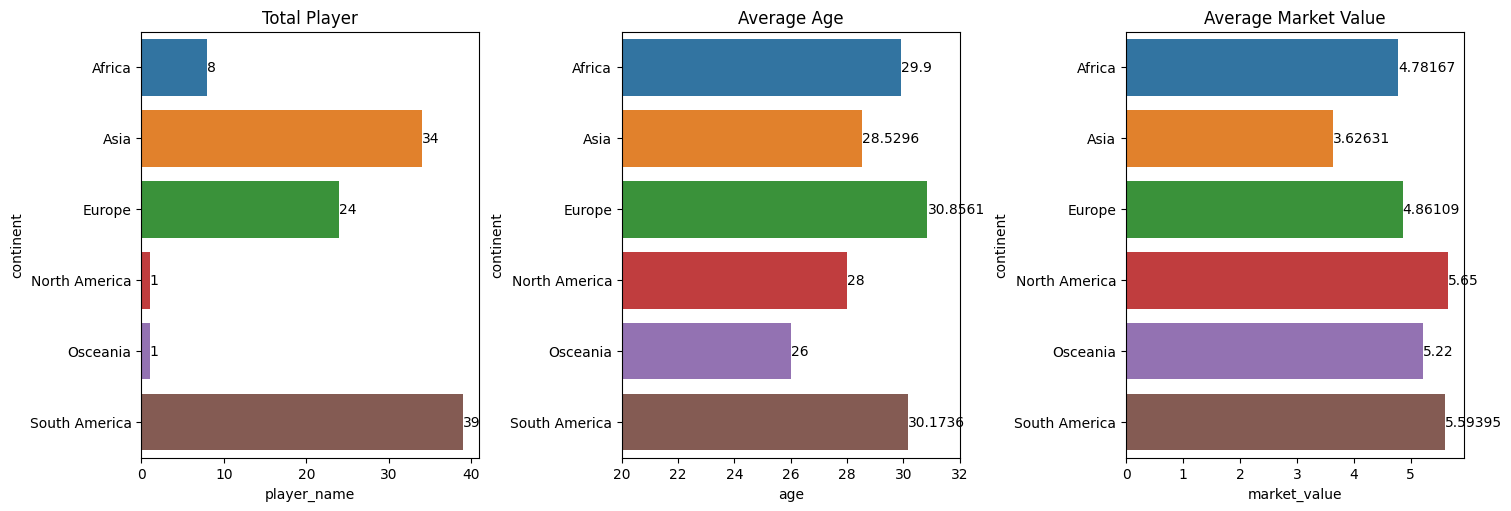

In [40]:
fig, axs = plt.subplots(figsize=(15,5), ncols=3, constrained_layout=True)

continent_plot = sns.barplot(data=continent, x='player_name', y=continent.index, ax=axs[0])
continent_plot.bar_label(continent_plot.containers[0])
continent_plot.set_title("Total Player")

ax10 = sns.barplot(data=continent, x='age', y=continent.index, ax=axs[1])
ax10.bar_label(ax10.containers[0])
ax10.set_title("Average Age")
ax10.set_xlim(20,32)

ax20 = sns.barplot(data=continent, x='market_value', y=continent.index, ax=axs[2])
ax20.bar_label(ax20.containers[0])
ax20.set_title("Average Market Value")

15. Get Information based on player position

In [41]:
position = player_data.groupby('position')[["player_name","market_value","height","age"]].aggregate({"player_name":'count',"market_value":'mean','height':'mean','age':'mean'}).round(2).sort_values(by='player_name')
position

,player_name,market_value,height,age
position,,,,
Left Winger,34,2.44,1.71,27.03
Central Midfield,38,2.76,1.71,25.67
Left-Back,41,2.16,1.72,24.98
Right-Back,45,2.32,1.73,25.40
Right Winger,51,2.39,1.70,25.32
Attacking Midfield,62,3.10,1.72,25.16
Defensive Midfield,62,2.17,1.74,25.43
Centre-Forward,69,2.59,1.80,25.54
Goalkeeper,72,1.89,1.81,25.03


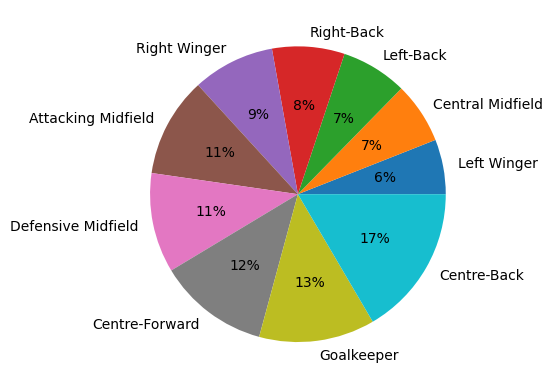

In [42]:
plt.pie(position['player_name'], labels = position.index, autopct='%.0f%%')
plt.show()

(20.0, 30.0)

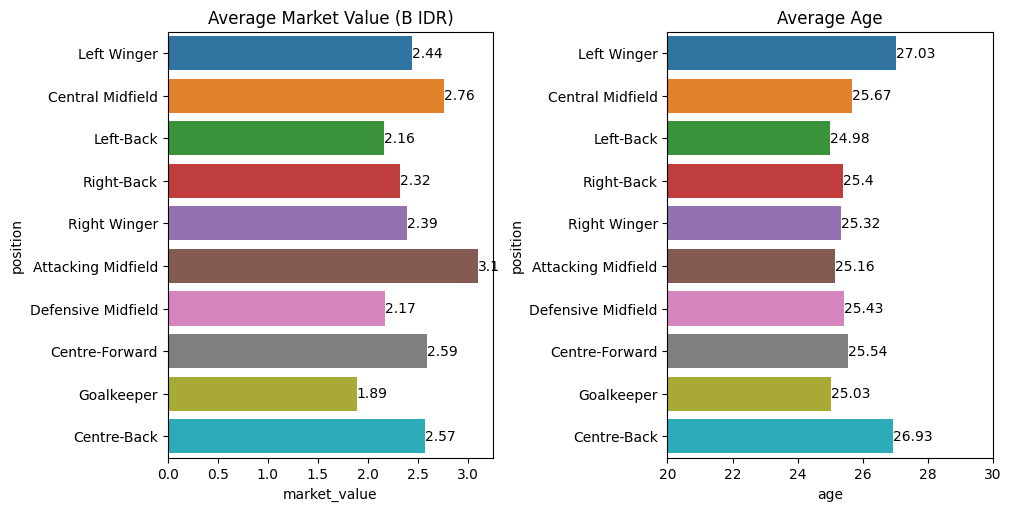

In [43]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2, constrained_layout=True)

ax = sns.barplot(data=position, x='market_value', y=position.index, ax=axs[0])
ax.bar_label(ax.containers[0])
ax.set_title("Average Market Value (B IDR)")

ax2 = sns.barplot(data=position, x='age', y=position.index, ax=axs[1])
ax2.bar_label(ax2.containers[0])
ax2.set_title("Average Age")
ax2.set_xlim(20,30)

16. Groupping by simplier position (forward, midfielder, defense, goalkeeper)

In [44]:
pos_dict = {'Centre-Forward':'Forward','Right Winger':'Forward', 'Left Winger':'Forward',
            'Attacking Midfield':'Midfielder','Central Midfield':'Midfielder', 'Defensive Midfield':'Midfielder', 
            'Centre-Back':'Defense','Right-Back':'Defense','Left-Back':'Defense'}

In [45]:
new_position = position.reset_index()
new_position = new_position.replace({'position':pos_dict})

In [46]:
new_position = new_position.groupby('position')[["player_name","market_value","height","age"]].aggregate({"player_name":'sum',"market_value":'mean','height':'mean','age':'mean'}).round(2).sort_values(by='player_name')
new_position

,player_name,market_value,height,age
position,,,,
Goalkeeper,72,1.89,1.81,25.03
Forward,154,2.47,1.74,25.96
Midfielder,162,2.68,1.72,25.42
Defense,180,2.35,1.76,25.77


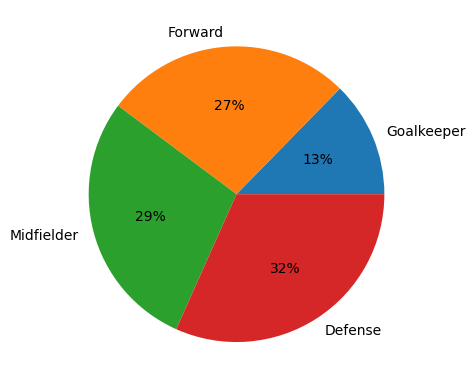

In [47]:
plt.pie(new_position['player_name'], labels = new_position.index, autopct='%.0f%%')
plt.show()

(20.0, 30.0)

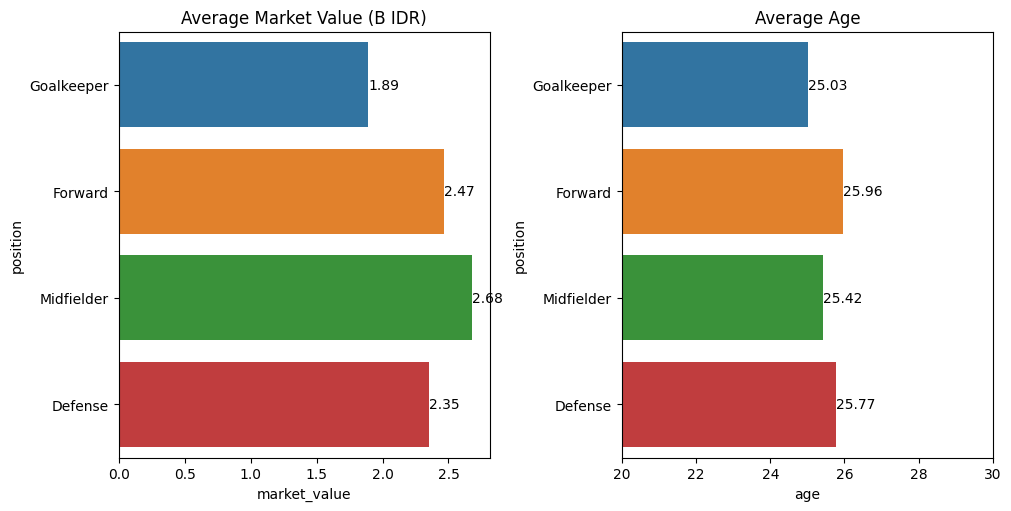

In [48]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2, constrained_layout=True)

ax = sns.barplot(data=new_position, x='market_value', y=new_position.index, ax=axs[0])
ax.bar_label(ax.containers[0])
ax.set_title("Average Market Value (B IDR)")

ax2 = sns.barplot(data=new_position, x='age', y=new_position.index, ax=axs[1])
ax2.bar_label(ax2.containers[0])
ax2.set_title("Average Age")
ax2.set_xlim(20,30)

17. Position of U-23 Indonesia player

In [49]:
u23 = player_data[(player_data['age']< 23) & (player_data['nationality']=='Indonesia')]
pos_u23 = u23.groupby('position')['player_name'].count().sort_values()
pos_u23

position
Left Winger            7
Right-Back            10
Central Midfield      12
Left-Back             13
Right Winger          16
Defensive Midfield    19
Centre-Forward        20
Goalkeeper            20
Centre-Back           21
Attacking Midfield    23
Name: player_name, dtype: int64

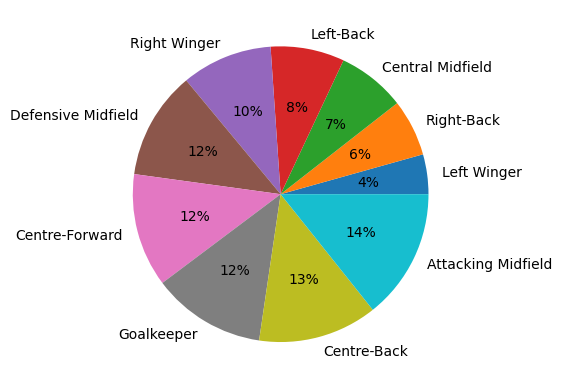

In [50]:
plt.pie(pos_u23.values, labels = pos_u23.index, autopct='%.0f%%')
plt.show()

18. Total U-23 Indonesia players in each club

In [51]:
club_u23 = u23.groupby('club_name')['player_name'].count()
club_u23

club_name
Arema FC                6
Bali United FC          6
Bhayangkara FC         10
Borneo FC Samarinda    11
Dewa United FC          8
Madura United FC        6
PS Barito Putra        10
PSIS Semarang          10
PSM Makassar           12
PSS Sleman              9
Persebaya Surabaya     11
Persib Bandung          6
Persija Jakarta        12
Persik Kediri           4
Persikabo 1973          7
Persis Solo            12
Persita Tangerang      14
RANS Nusantara FC       7
Name: player_name, dtype: int64

19. Groupping by strongest foot

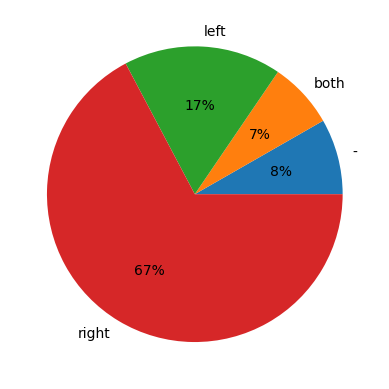

In [52]:
foot = player_data.groupby('foot')['player_name'].count()
plt.pie(foot.values, labels = foot.index, autopct='%.0f%%')
plt.show()

## These are some examples of facts and insights that I can get from the 2023-2024 league 1 player dataset and maybe there are many more insights that can be obtained!!!